In [4]:
# Set proper path
import os
current_dir = os.getcwd()
if "notebooks" in current_dir:
    current_dir = os.chdir("../")

import lvpyio as lv
import numpy as np
import matplotlib.pyplot as plt

n_frames = 100

def load_frame(frame_number, camera_number=0):
    buffer = lv.read_buffer("data/raw/batch1/" + f"B{str(frame_number+1).zfill(5)}.im7")
    image = buffer[camera_number].as_masked_array().data
    return image

def threshold_projection(image, a, b):
    return (np.clip(image, a, b) - a)/(b-a)

In [11]:
# Load the first frame
img_path = "data/interim/batch1/cam0/B00001.png"
img = plt.imread(img_path)

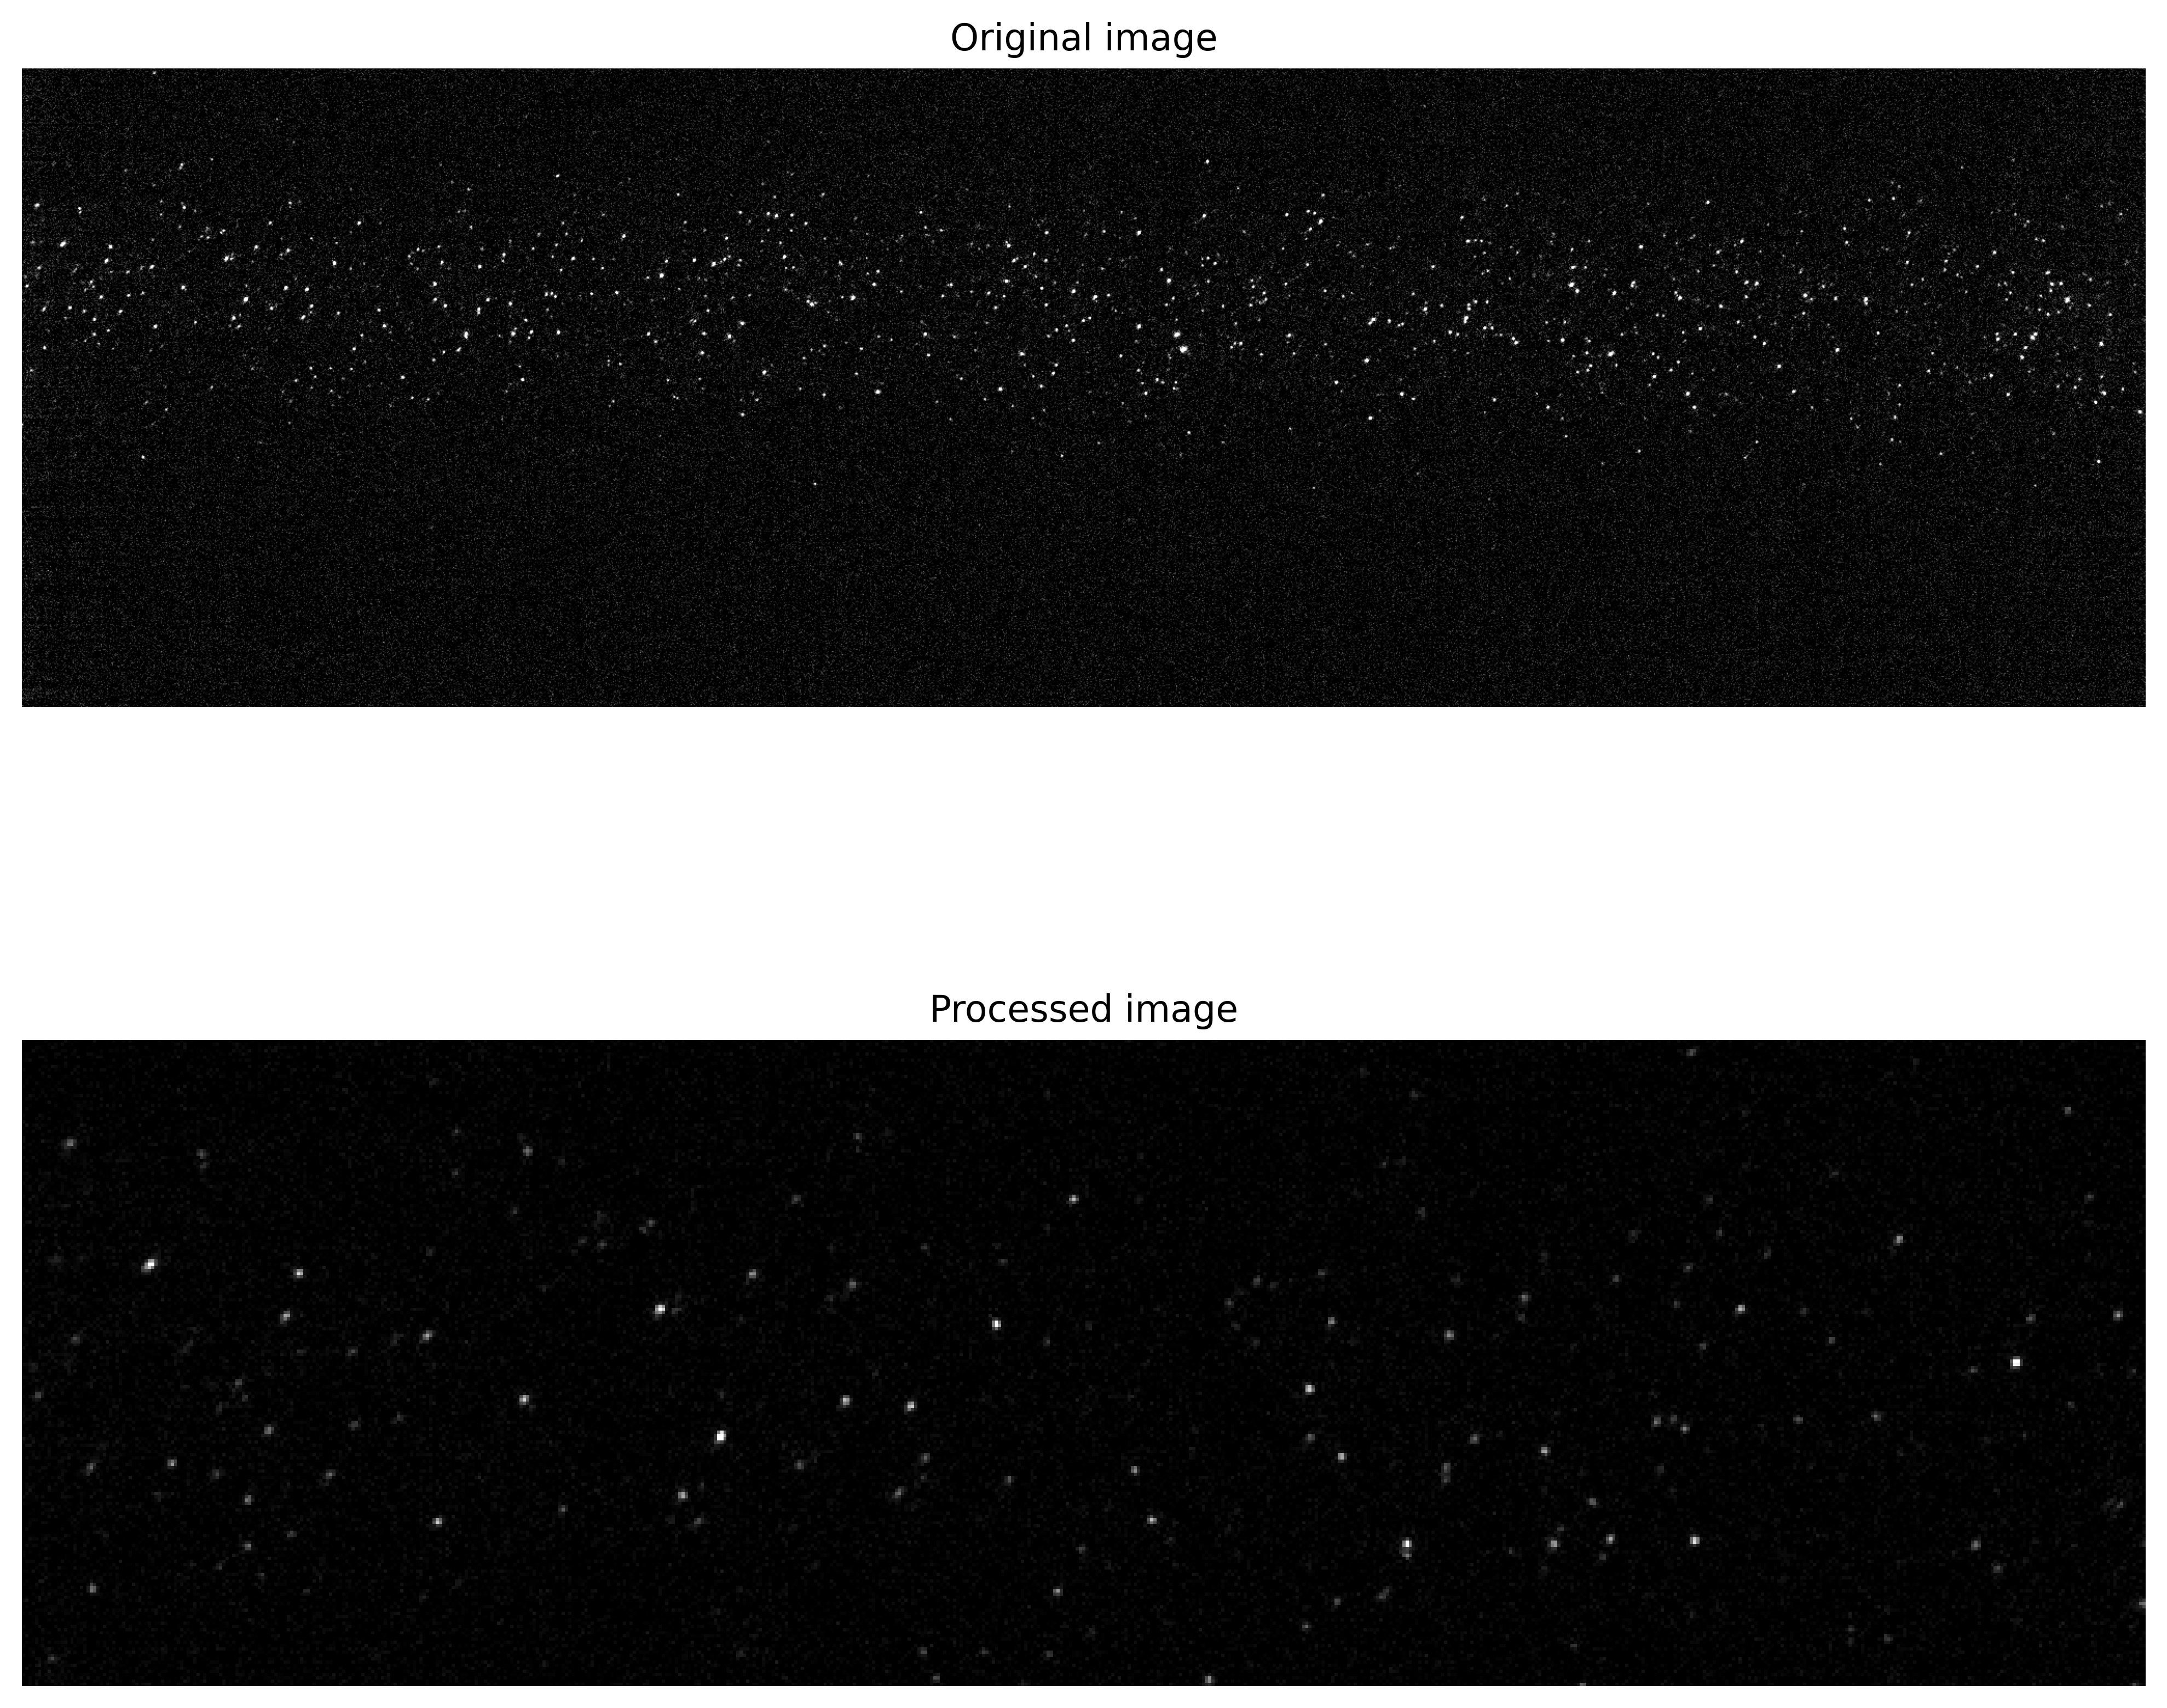

In [21]:
f = lambda img: threshold_projection(img, 0, 50)

plt.figure(figsize=(10,10), dpi=400)
plt.subplot(2,1,1)

plt.title("Original image")
plt.imshow(f(load_frame(0,0)), cmap='gray')
plt.axis('off')

plt.subplot(2,1,2)
plt.title("Processed image")
plt.imshow(f(img[:,:657]), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.savefig("reports/figures/raw_processed.png", dpi=400, bbox_inches='tight')
plt.show()

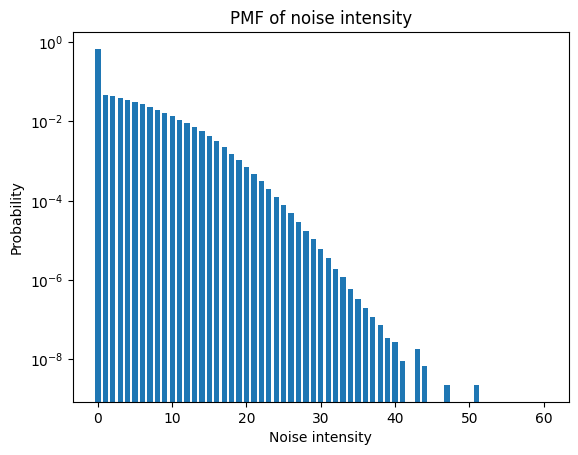

In [24]:
CamDataNormalizedCumalative = np.load('notebooks/CamDataNormalizedCumalative.npy')
pdf = np.diff(CamDataNormalizedCumalative[:61,0], prepend=0)

# Plot the PDF bar plot on log sacale
plt.bar(np.arange(len(pdf)), pdf, width=.7)
plt.yscale('log')
plt.xlabel('Noise intensity')
plt.ylabel('Probability')
plt.title('PMF of noise intensity')
plt.savefig("reports/figures/noise_pmf.png", dpi=400, bbox_inches='tight')
plt.show()

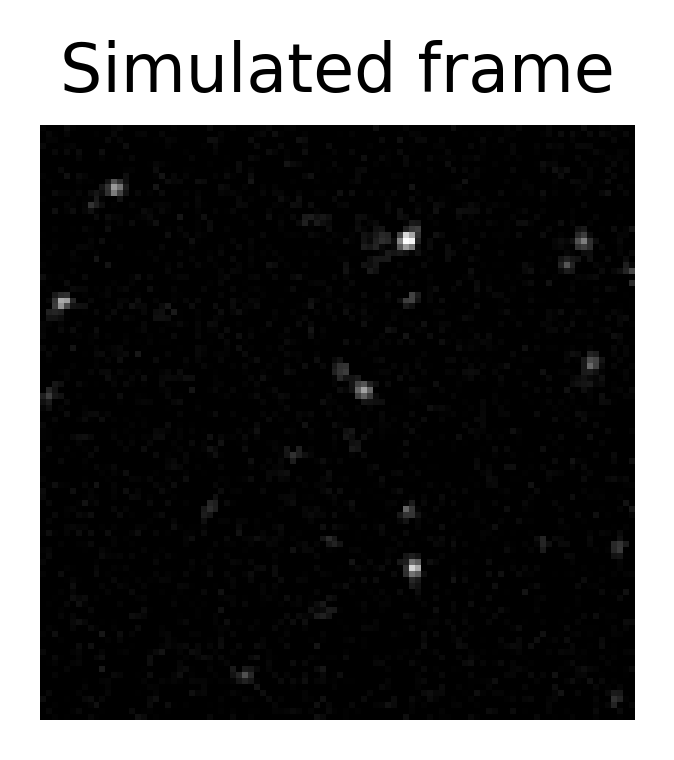

In [40]:
from src.data.simulate_dataset import load_dataset

# Simulate a dataset
#dataloader = load_dataset(1)

#images, labels, _ = next(iter(dataloader))

# Move color channel to the last dimension
#img = images[0, 1:4, :, :].permute(1,2,0)
img = images[0, 4, :, :]

# Plot the first frame
plt.figure(figsize=(2,2), dpi=400)
plt.title("Simulated frame")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.savefig("reports/figures/simulated_frame.png", dpi=400, bbox_inches='tight')
plt.show()
